# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import pandas as pd

# Adjust the file path to your dataset
file_path = 'C:/Users/a7902/OneDrive/Documents/GitHub/ml-project-unsupervised-learning/Wholesale_Data.csv'

df = pd.read_csv(file_path)

# Check the first few rows
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Cleaning:
Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.

In [3]:
import pandas as pd

# 1. Data Cleaning - Checking for missing values
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

# Fill missing values if any (not needed in this case since there are no missing values)
df.fillna(df.mean(), inplace=True)

# 2. Summary Statistics (mean, median, std, etc.)
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)

# 3. Median for each column
median_values = df.median()
print("\nMedian Values:\n", median_values)

Missing Data:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Summary Statistics:
           Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.0000

## Data Description:

Summary Statistics:

Fresh has a mean of 12,000, with a standard deviation of 12,647, indicating a wide spread in the data.

Milk has a mean of 5,796 and a standard deviation of 7,380, showing some variability as well.

Grocery has a mean of 7,951, and a max value of 92,780, with some significant outliers at the high end.

Other columns like Frozen, Detergents_Paper, and Delicassen also show variability, with high max values and large standard deviations.

Median Values:

The median values for each column are shown, such as Fresh (8,504), Milk (3,627), and Grocery (4,755.5). These median values indicate the central tendency of the data, which can help assess the skewness of the distribution.

## Data Visualization

1. Histograms: To understand the distribution of each variable.
2. Box Plots: To detect outliers and observe the spread of the data.
3. Scatter Plot: To visualize the relationship between variables, such as "Fresh" and "Milk."
4. Correlation Heatmap: To understand the relationships and trends between different variables.

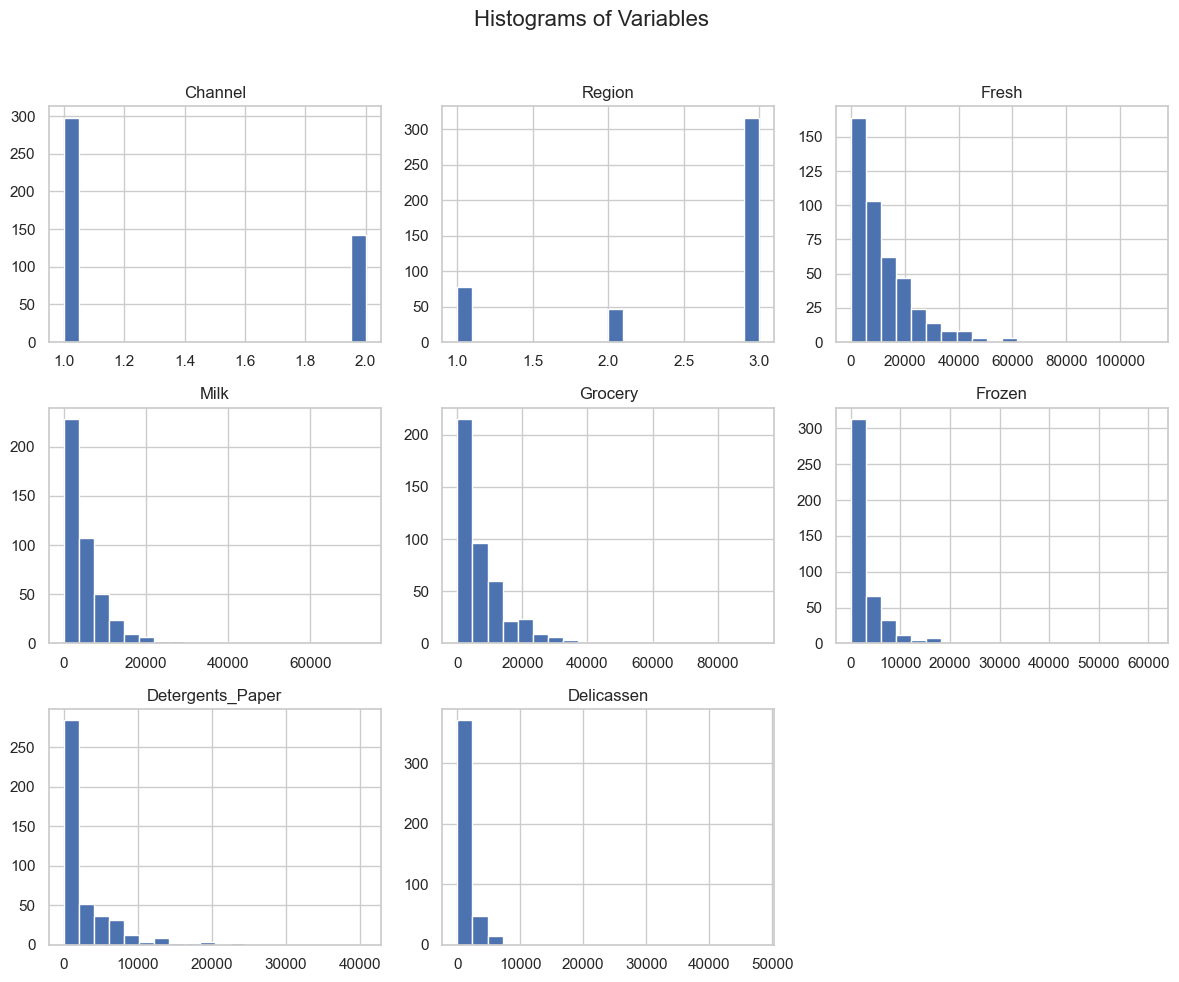

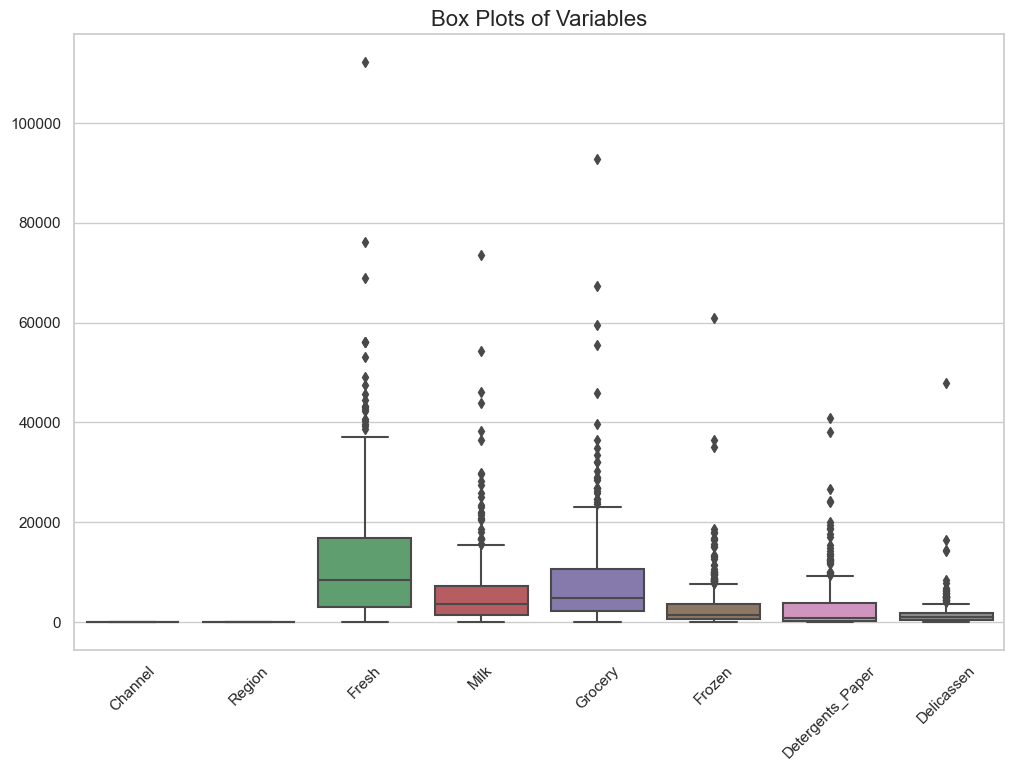

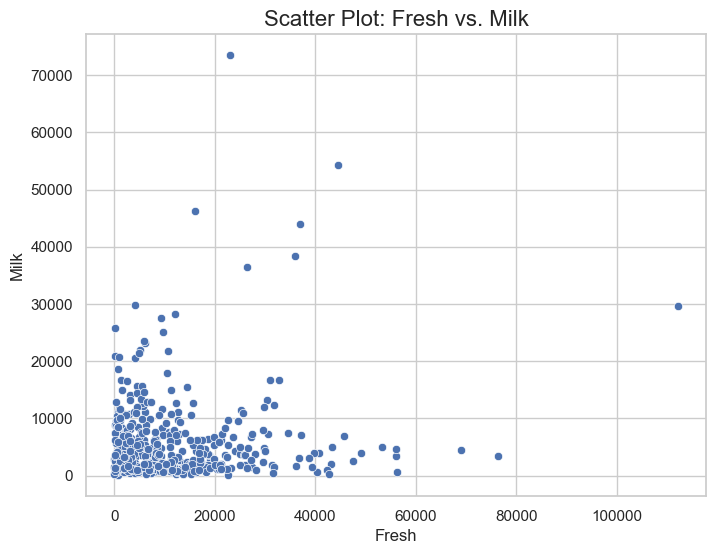

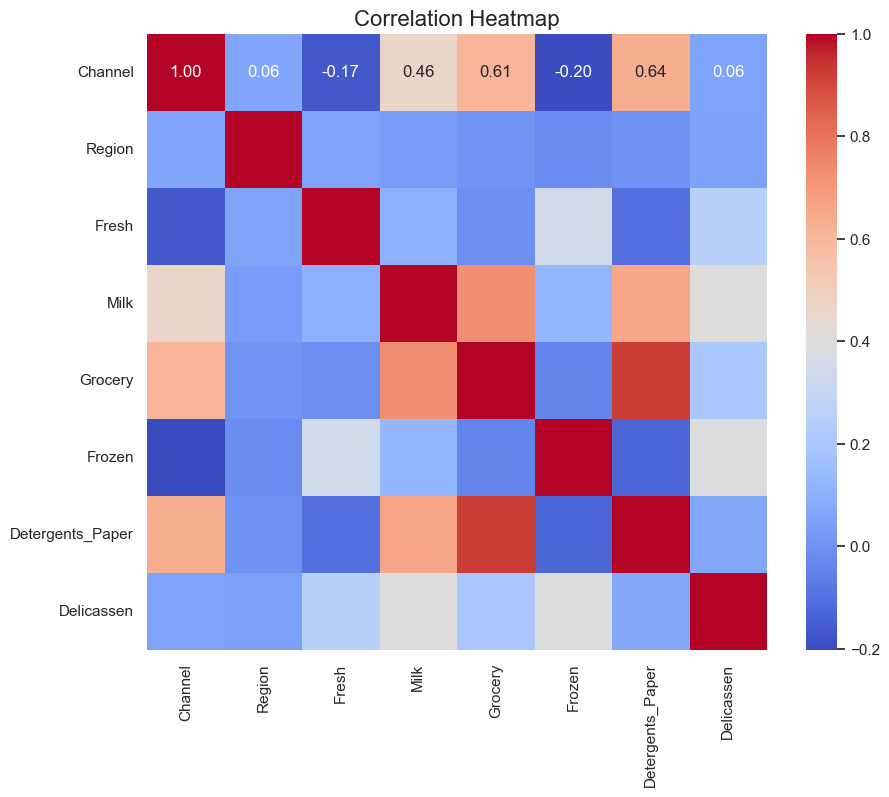

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plots
sns.set(style="whitegrid")

# 1. Histogram for each variable
df.hist(bins=20, figsize=(12, 10), layout=(3, 3))
plt.suptitle('Histograms of Variables', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Box Plot for each variable to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plots of Variables', size=16)
plt.xticks(rotation=45)
plt.show()

# 3. Scatter plot between 'Fresh' and 'Milk'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fresh', y='Milk', data=df)
plt.title('Scatter Plot: Fresh vs. Milk', size=16)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', size=16)
plt.show()

## Outlier Detection

1. Using the Interquartile Range (IQR) Method:
This method defines outliers as data points that lie outside 1.5 times the IQR above the third quartile (Q3) or below the first quartile (Q1).

2. Using Z-Score:
The Z-score represents how many standard deviations a data point is from the mean. Typically, a Z-score above 3 or below -3 indicates an outlier.

In [8]:
import numpy as np
from scipy import stats

# 1. IQR Method
def detect_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outliers_iqr = detect_outliers_iqr(df)
for column, count in outliers_iqr.items():
    print(f'Number of outliers detected in {column} using IQR: {count}')

# 2. Z-Score Method
def detect_outliers_zscore(df, threshold=3):
    outlier_counts = {}
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
    outliers_indices = np.where(z_scores > threshold)
    
    for column in df.columns[outliers_indices[1]]:
        outliers = df.iloc[outliers_indices[0], :]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outliers_zscore = detect_outliers_zscore(df)
for column, count in outliers_zscore.items():
    print(f'\nNumber of outliers detected in {column} using Z-Score: {count}')

Number of outliers detected in Channel using IQR: 0
Number of outliers detected in Region using IQR: 0
Number of outliers detected in Fresh using IQR: 20
Number of outliers detected in Milk using IQR: 28
Number of outliers detected in Grocery using IQR: 24
Number of outliers detected in Frozen using IQR: 43
Number of outliers detected in Detergents_Paper using IQR: 30
Number of outliers detected in Delicassen using IQR: 27

Number of outliers detected in Milk using Z-Score: 43

Number of outliers detected in Delicassen using Z-Score: 43

Number of outliers detected in Fresh using Z-Score: 43

Number of outliers detected in Grocery using Z-Score: 43

Number of outliers detected in Detergents_Paper using Z-Score: 43

Number of outliers detected in Frozen using Z-Score: 43


1. IQR Method:
Detects outliers by computing the interquartile range (IQR) and identifying points outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR].

2. Z-Score Method:
Flags data points that are more than 3 standard deviations from the mean.

## Correlation Analysis

In [19]:
import pandas as pd

# Calculate the correlation matrix for the entire dataset
correlation_matrix = df.corr()

# Display the entire correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Display the correlation between 'Grocery' and 'Detergents_Paper'
grocery_detergents_corr = correlation_matrix.loc['Grocery', 'Detergents_Paper']
print(f"\nCorrelation between 'Grocery' and 'Detergents_Paper': {grocery_detergents_corr:.4f}")

Correlation Matrix:
                    Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery      

1. Correlation Matrix: The correlation matrix shows the relationships between all variables. For example:

- Grocery and Detergents_Paper have a very high correlation of 0.924, indicating a strong positive relationship between these two variables.
- Milk also has a strong positive correlation with Grocery (0.728) and Detergents_Paper (0.662).
- Fresh has relatively weak correlations with other variables, such as Milk (0.100) and Grocery (-0.012).

2. Grocery and Detergents_Paper:

- The correlation between Grocery and Detergents_Paper is 0.924, which suggests that when Grocery sales increase, sales of Detergents_Paper also tend to increase significantly.

## Data Transformation

1. Standardization:
This transformation rescales data to have a mean of 0 and a standard deviation of 1. It’s useful when I want to compare variables with different units.

2. Normalization:
This rescales the data to a fixed range, typically between 0 and 1. It’s useful when the goal is to compare relative differences.

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Standardization (mean = 0, standard deviation = 1)
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)
print("Standardized Data (first 5 rows):\n", df_standardized.head())

# 2. Normalization (values between 0 and 1)
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)
print("\nNormalized Data (first 5 rows):\n", df_normalized.head())

Standardized Data (first 5 rows):
     Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  

Normalized Data (first 5 rows):
    Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.112940  0.130727  0.081464  0.003106          0.065427   
1      1.0     1.0  0.062899  0.132824  0.103097  0.028548          0.080590   
2      1.0     1.0  0.056622  0.119181  0.082790  0.039116          0.086052   
3      0.0     1

## Feature Selection

1. Principal Component Analysis (PCA):
PCA reduces the dimensionality of the dataset by identifying the components that explain the most variance in the data.

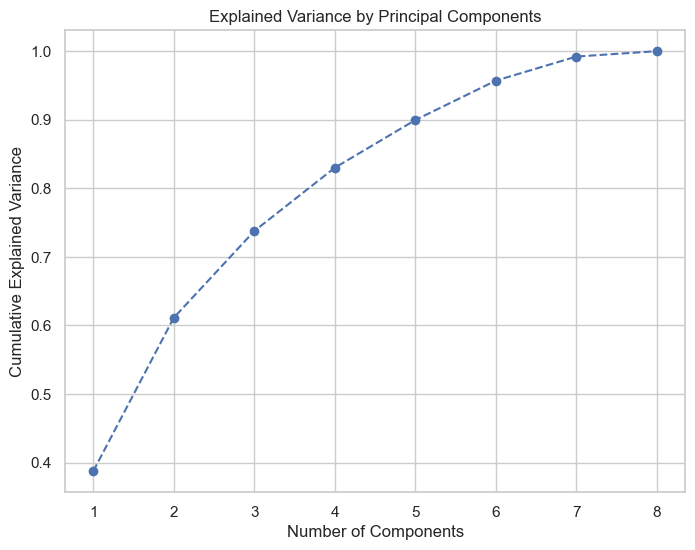


Explained Variance Ratio:
 [0.38750123 0.22374588 0.12647173 0.09229904 0.06957905 0.05741354
 0.03514076 0.00784877]


In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the data before applying PCA
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Apply PCA to reduce dimensions and find the most important components
pca = PCA(n_components=len(df.columns))  # Number of components equal to the number of variables
pca.fit(df_standardized)

# Plot explained variance to see how many components capture the most variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df.columns) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Print the explained variance for each component
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)

1. The first two principal components explain approximately 61% of the variance in the dataset:

    - PC1 (38.75%) and PC2 (22.37%) account for the majority of the variance, indicating that a significant portion of the information in the dataset can be captured by these two components.



2. Random Forest Regression:
Random Forest provides feature importance scores based on how much each feature improves the model's predictive performance.


Feature Importance from Random Forest:
             Feature  Importance
4            Frozen    0.305681
6        Delicassen    0.209173
5  Detergents_Paper    0.161654
2              Milk    0.159052
3           Grocery    0.138538
1            Region    0.016605
0           Channel    0.009296


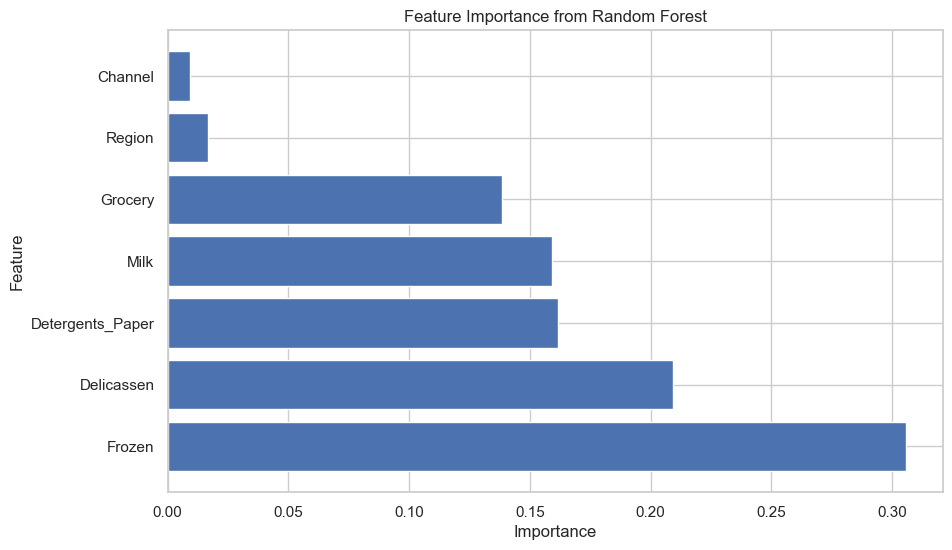

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor to estimate feature importance 
# For demonstration, let’s use 'Fresh' as the target column 
X = df.drop('Fresh', axis=1)  # Features
y = df['Fresh']  # Target

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance from Random Forest:\n", feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

1. Frozen (30.57%) and Delicassen (20.92%) are the most important features in predicting the target variable (Fresh).
2. Detergents_Paper, Milk, and Grocery are also important contributors, while Region and Channel have much lower importance.

Conclusion:

If we are focused on feature selection, Frozen, Delicassen, and Detergents_Paper are the most influential features, according to Random Forest regression.

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

### Steps for K-Means Clustering:
1. Pre-processing: Standardize the data so that each feature has a mean of 0 and a standard deviation of 1.

2. Determine the Optimal Number of Clusters: Use methods like the Elbow Method or Silhouette Score to find the optimal number of clusters.

3. Initialize Centroids & Assign Data Points: Initialize centroids, assign data points to the closest centroid, and update centroids iteratively.

c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

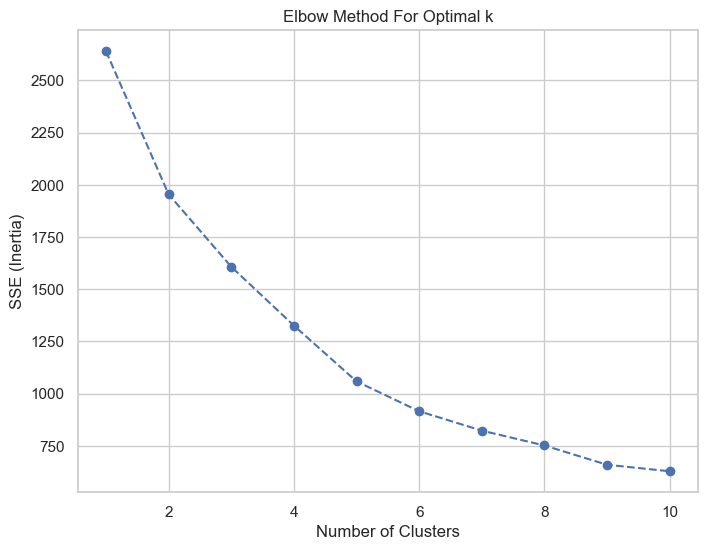

c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 3 clusters: 0.53836620585661


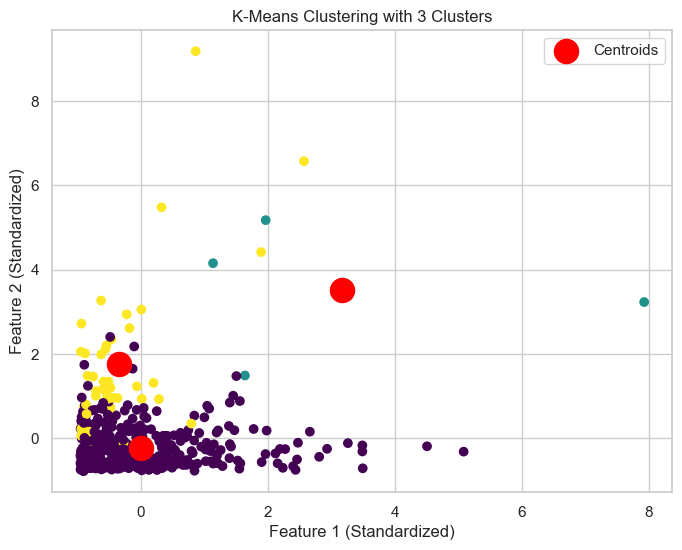

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Pre-processing: Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

# 2. Determine the Optimal Number of Clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

# 3. Perform K-Means Clustering with optimal k (e.g., k=3)
# Choose k=3 as an example; use elbow method to decide
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_standardized)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# 4. Calculate silhouette score to evaluate the clustering quality
silhouette_avg = silhouette_score(df_standardized, clusters)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

# 5. Visualize the clustering (if applicable)
plt.figure(figsize=(8, 6))
plt.scatter(df_standardized[:, 0], df_standardized[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

1. Standardization: Features like Fresh, Milk, etc., are standardized to ensure that all variables are treated equally during distance calculations.
2. Elbow Method: Helps determine the optimal number of clusters (k) by observing the point where the SSE (Sum of Squared Errors) starts to flatten.
3. K-Means Clustering: After determining the optimal number of clusters, K-Means is applied to group the products.
4. Silhouette Score: Evaluates the quality of clustering. A higher score (closer to 1) indicates that clusters are well separated.


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

To perform Hierarchical Clustering, we will follow these steps:

1. Pre-process the data: Standardize the dataset to ensure that all features are on the same scale.
2. Hierarchical Clustering: Use the Agglomerative Clustering method to create a hierarchy of clusters.
3. Dendrogram: Plot the dendrogram to visualize the hierarchical structure and determine the optimal number of clusters.

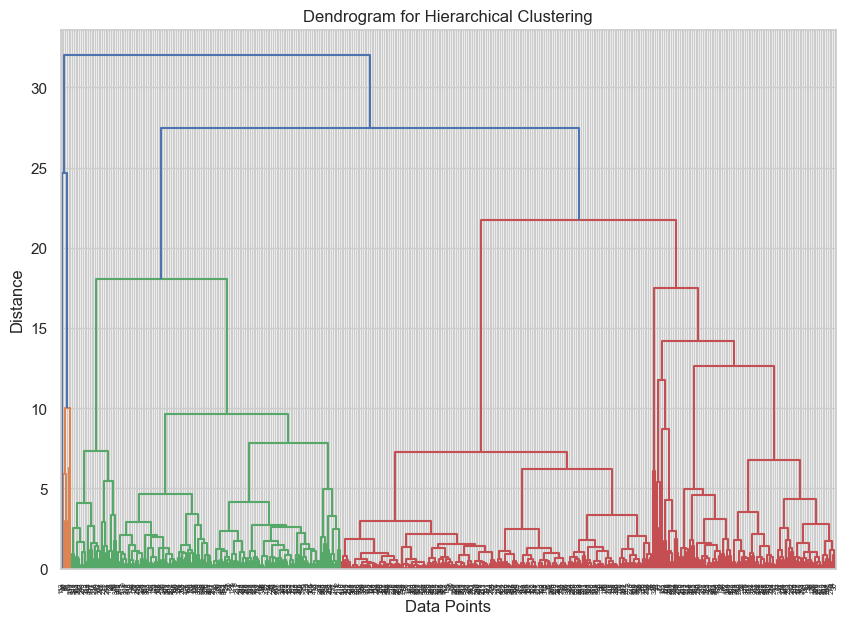

c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


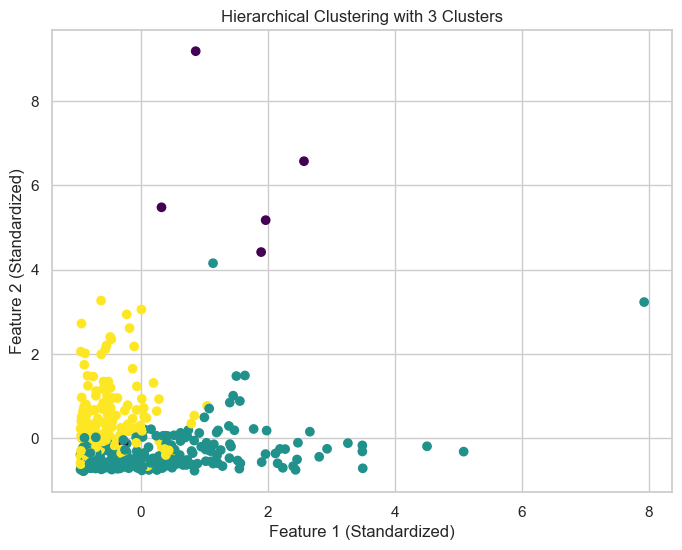

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# 1. Pre-process the data: Standardize the dataset
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

# 2. Perform Hierarchical Clustering using 'ward' method for linkage
Z = linkage(df_standardized, method='ward')

# 3. Plot the Dendrogram to visualize the hierarchy
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

# 4. Use Agglomerative Clustering to form clusters based on a chosen number of clusters (e.g., 3)

optimal_clusters = 3
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = hc.fit_predict(df_standardized)

# 5. Visualize the resulting clusters (optional)
plt.figure(figsize=(8, 6))
plt.scatter(df_standardized[:, 0], df_standardized[:, 1], c=df['Cluster'], cmap='viridis')
plt.title(f'Hierarchical Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

1. Standardization: The dataset is standardized to ensure equal weighting of all features in the clustering process.
2. Dendrogram: The dendrogram helps visualize the clustering hierarchy.
4. Agglomerative Clustering: After choosing the optimal number of clusters from the dendrogram, the algorithm assigns data points to clusters.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Steps:
1. Pre-processing: Standardize the dataset, as PCA is sensitive to the variance of each feature.
2. Apply PCA: Compute the principal components to identify the combinations of features that best describe the variance in the data.
3. Variance Explained: Analyze how much variance each principal component explains.


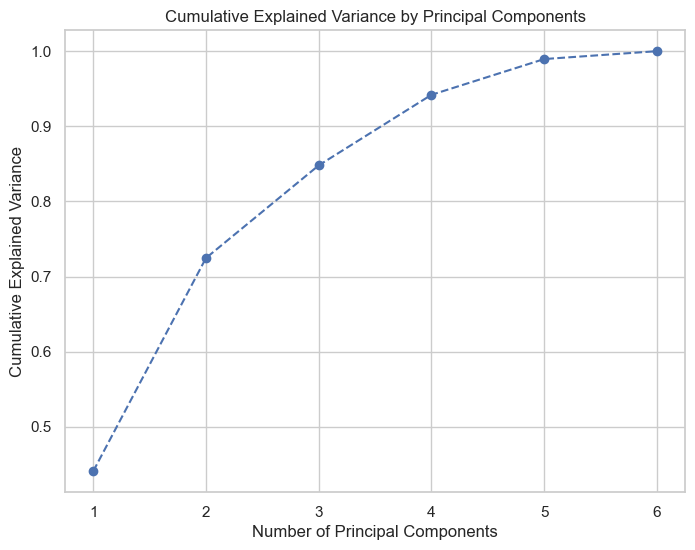

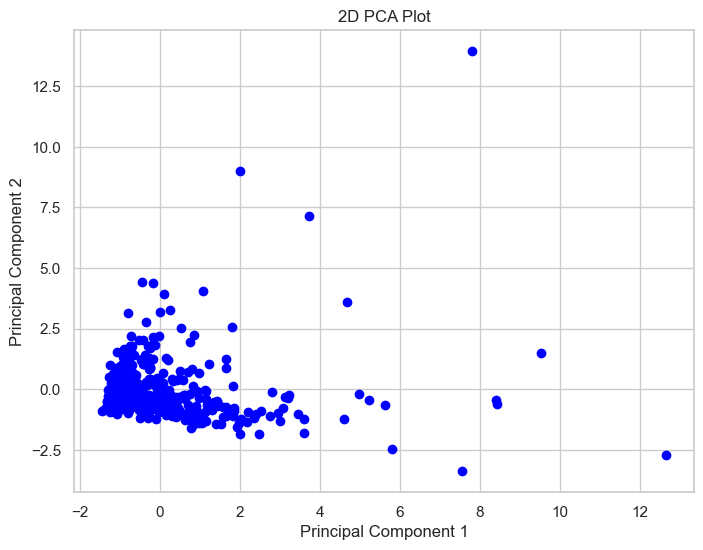

PCA Loadings:
                        PC1       PC2       PC3       PC4       PC5       PC6
Fresh             0.042884  0.527932 -0.812257 -0.236686 -0.048683 -0.036025
Milk              0.545118  0.083168  0.060388 -0.087190  0.826579 -0.038040
Grocery           0.579256 -0.146088 -0.108384  0.105987 -0.314999  0.721745
Frozen            0.051189  0.611278  0.178386  0.768683 -0.027932 -0.015637
Detergents_Paper  0.548640 -0.255233 -0.136192  0.171744 -0.339640 -0.685894
Delicassen        0.248682  0.504207  0.523904 -0.552065 -0.314701 -0.075134


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Pre-processing: Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

# 2. Apply PCA to the standardized data
pca = PCA()
pca_data = pca.fit_transform(df_standardized)

# 3. Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance to decide how many components to keep
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 4. PCA Components - You can visualize the first 2 components
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(df_standardized)

# Plot the data in the first two principal component axes
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1], c='blue')
plt.title('2D PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# 5. Display PCA loadings (how the original features contribute to the principal components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
                        index=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
print("PCA Loadings:\n", loadings)

# Part V - Conclusion

From the model developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

First Principal Component (PC1): The Grocery, Detergents_Paper, and Milk variables have high positive loadings on PC1, indicating that these three features contribute the most to the overall variance captured by this component. This suggests a strong relationship between these product categories in customer purchasing behavior.

Second Principal Component (PC2): The Fresh and Frozen variables contribute significantly to PC2. This component may represent a distinct purchasing pattern related to fresh and frozen goods, separate from the behavior captured in PC1.

Product Grouping: The results of PCA reveal that Milk, Grocery, and Detergents_Paper tend to be purchased together, while Fresh and Frozen products form another group, suggesting that customer purchasing behavior can be described by these distinct product groupings.

These findings help to uncover patterns in customer purchases and can guide strategies for targeted marketing or inventory management.

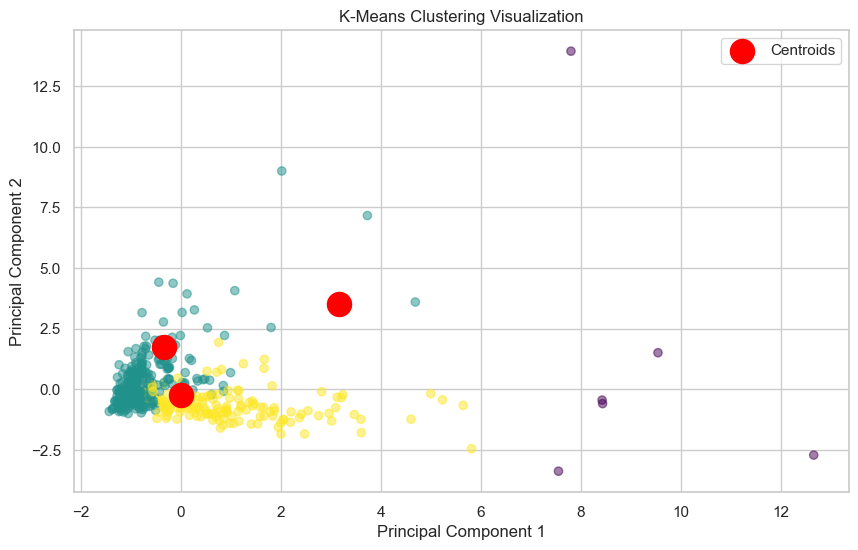

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already performed K-Means clustering and PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

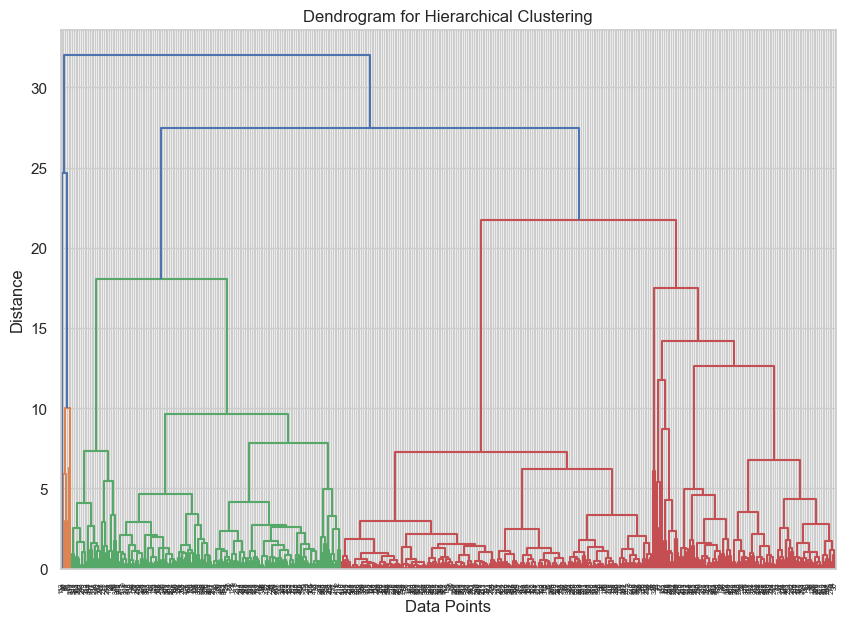

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Linkage for hierarchical clustering
Z = linkage(df_standardized, method='ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

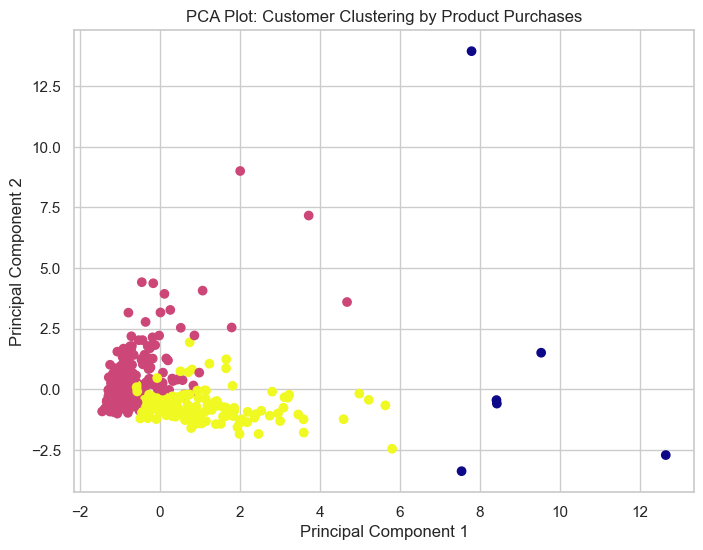

In [28]:
# PCA 2D plot (assuming first 2 principal components explain enough variance)
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1], c=df['Cluster'], cmap='plasma')
plt.title('PCA Plot: Customer Clustering by Product Purchases')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()